In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Sub-Gradient Method for Optimization minimizes non-differentiable convex functions.
# It uses subgradients, a generalization of gradients for non-smooth points. Steps:
# 1. Initialize `x(0)`, set `f_best` to the initial cost, and choose a step size `α`.
# 2. Compute a subgradient `g(k)` at `x(k)`, which points in a direction where the function
#    does not decrease.
# 3. Update the position: `x(k+1) = x(k) - α * g(k)`.
# 4. If the cost at `x(k+1)` improves `f_best`, update `f_best` and `x*`.
# 5. Repeat until stopping criterion is met


class SubGradientMethod:
    def __init__(self, alpha=0.01, max_iterations=1000):
        self.alpha = alpha  # Step size
        self.max_iterations = max_iterations
        self.x_history = []
        self.cost_history = []

    def cost_function(self, x):
        # non-differentiable function: Absolute value function f(x, y) = |x| + |y|
        return np.abs(x[0]) + np.abs(x[1])

    def subgradient(self, x):
        # subgradient of |x| + |y|
        grad = np.zeros_like(x)
        grad[0] = 1 if x[0] > 0 else -1 if x[0] < 0 else 0
        grad[1] = 1 if x[1] > 0 else -1 if x[1] < 0 else 0
        return grad

    def fit(self, initial_x):
        x = initial_x
        f_best = self.cost_function(x)
        x_best = x.copy()
        self.x_history.append(x.copy())
        self.cost_history.append(f_best)

        for k in range(self.max_iterations):
            # Compute the subgradient
            subgrad = self.subgradient(x)

            x = x - self.alpha * subgrad

            f_new = self.cost_function(x)
            self.x_history.append(x.copy())
            self.cost_history.append(f_new)

            if f_new < f_best:
                f_best = f_new
                x_best = x.copy()

        return x_best

Optimized x: [-6.38378239e-16 -6.38378239e-16]


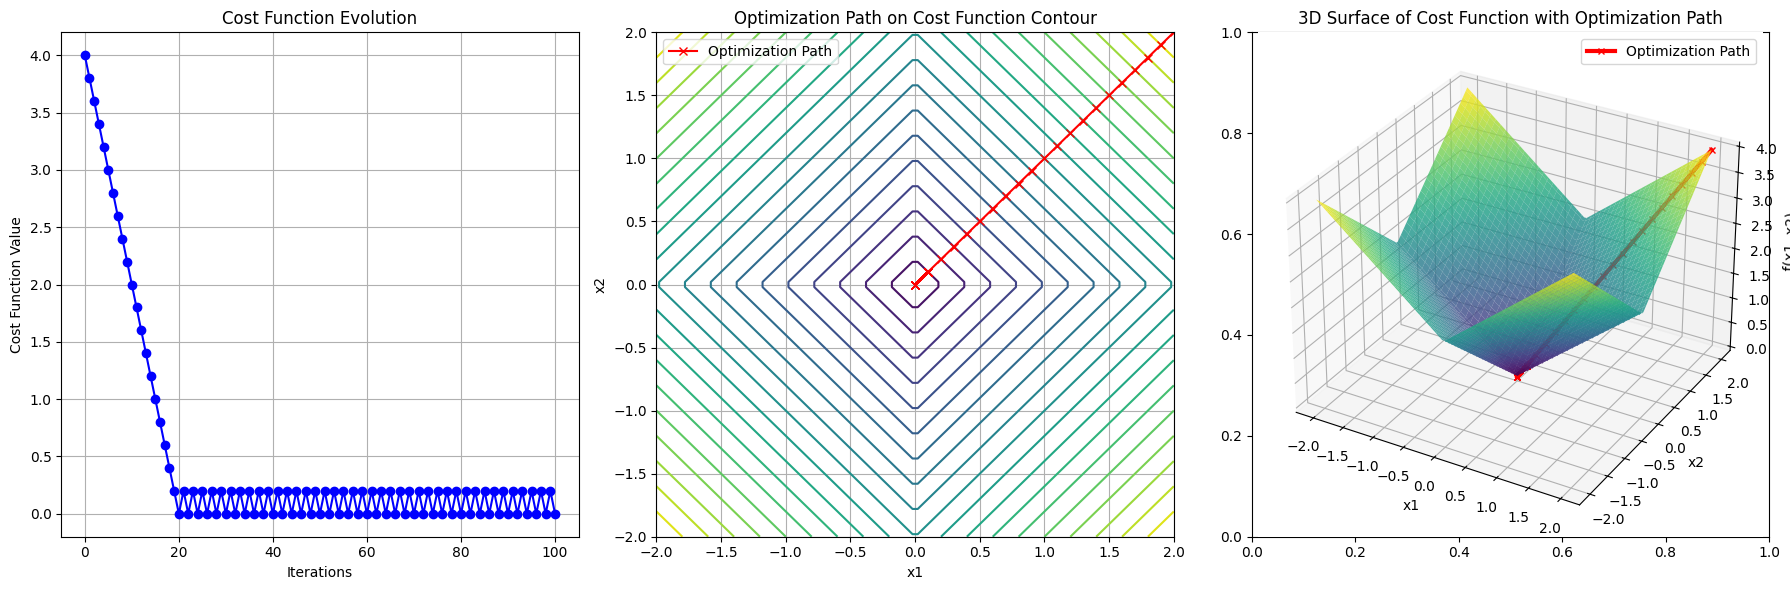

In [17]:
if __name__ == "__main__":

    optimizer = SubGradientMethod(alpha=0.1, max_iterations=100)

    initial_x = np.array([2.0, 2.0])
    optimized_x = optimizer.fit(initial_x)

    print("Optimized x:", optimized_x)

    x_vals = np.array(optimizer.x_history)
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = np.abs(X1) + np.abs(X2)

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].plot(optimizer.cost_history, color='blue', marker='o')
    ax[0].set_title("Cost Function Evolution")
    ax[0].set_xlabel("Iterations")
    ax[0].set_ylabel("Cost Function Value")
    ax[0].grid(True)

    ax[1].contour(X1, X2, Z, levels=20, cmap='viridis')
    ax[1].plot(x_vals[:, 0], x_vals[:, 1], 'r-x', label="Optimization Path")
    ax[1].set_title("Optimization Path on Cost Function Contour")
    ax[1].set_xlabel("x1")
    ax[1].set_ylabel("x2")
    ax[1].legend()
    ax[1].grid(True)

    ax3 = fig.add_subplot(133, projection='3d')
    ax3.view_init(elev=30, azim=-60)
    ax3.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
    ax3.plot([x[0] for x in optimizer.x_history], [x[1] for x in optimizer.x_history], [optimizer.cost_function(x) for x in optimizer.x_history], color='r', marker='x', markersize=5, linestyle='-', linewidth=3, label="Optimization Path")
    ax3.set_title('3D Surface of Cost Function with Optimization Path')
    ax3.set_xlabel('x1')
    ax3.set_ylabel('x2')
    ax3.set_zlabel('f(x1, x2)')
    ax3.legend()

    plt.tight_layout()
    plt.show()